In [1]:
# Import dependencies

import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PowerTransformer
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np

import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Read in data set
climate_df = pd.read_csv('ML_input.csv')
print(climate_df.shape)
climate_df.head()

(1056, 25)


state_name  year      tempc  co2_emissions  population_thousands  \
0     Alabama  1997  16.870370          134.9                  4368   
1     Arizona  1997  15.847222           71.8                  4737   
2    Arkansas  1997  15.365741           59.6                  2601   
3  California  1997  15.064815          346.6                 32486   
4    Colorado  1997   7.134259           75.7                  4018   

   rgdp_millions  pe_coal  pe_petroleum  pe_naturalgas  pe_nuclear  ...  \
0         143646   867264        524929         337431      310336  ...   
1         168550   369872        430092         137588      307623  ...   
2          82756   246786        320440         264019      149100  ...   
3        1378654    82651       3292194        2185029      320194  ...   
4         184193   362423        371516         311900           0  ...   

   drought  flooding  freeze  severe_storm  tropical_cyclone  wildfire  \
0        0         0       0             0                 0         0   
1        0         0       0             0                 0         0   
2        0         0       0             1                 0         0   
3        0         1       0             0                 0         0   
4        0         0       0             0                 0         0   

   winter_storm  state_abb      tempf  pe_totalrenew  
0             0         AL  62.366667         300020  
1             0         AZ  60.525000         143511  
2             0         AR  59.658333         124045  
3             0         CA  59.116667         767380  
4             0         CO  44.841667          38515  

[5 rows x 25 columns]

In [3]:
# Describe the numerical columns
climate_df.describe()

year        tempc  co2_emissions  population_thousands  \
count  1056.000000  1056.000000    1056.000000           1056.000000   
mean   2007.500000    11.617056     115.316193           6229.115530   
std       6.347295     4.292796     111.017878           6707.724329   
min    1997.000000     3.620370       5.500000            489.000000   
25%    2002.000000     8.222222      50.300000           1855.750000   
50%    2007.500000    11.118056      86.700000           4448.000000   
75%    2013.000000    14.847222     142.950000           7159.500000   
max    2018.000000    22.976852     701.100000          39462.000000   

       rgdp_millions       pe_coal  pe_petroleum  pe_naturalgas    pe_nuclear  \
count   1.056000e+03  1.056000e+03  1.056000e+03   1.056000e+03  1.056000e+03   
mean    3.113918e+05  4.127799e+05  7.572309e+05   5.087394e+05  1.686339e+05   
std     3.744255e+05  3.976723e+05  9.665282e+05   6.817288e+05  2.107614e+05   
min     2.002600e+04  0.000000e+00  7.524600e+04   5.789000e+03 -1.309000e+03   
25%     8.584825e+04  7.855925e+04  2.344212e+05   1.649898e+05  0.000000e+00   
50%     1.982660e+05  3.271690e+05  5.110925e+05   2.813145e+05  9.865600e+04   
75%     3.932578e+05  6.175798e+05  8.353508e+05   5.667525e+05  3.000062e+05   
max     2.721651e+06  1.695239e+06  6.998850e+06   4.564089e+06  1.031331e+06   

          re_biomass  ...        re_wind      drought     flooding  \
count    1056.000000  ...    1056.000000  1056.000000  1056.000000   
mean    79287.545455  ...   17087.632576     0.305871     0.088068   
std     66923.591892  ...   50334.365969     0.460994     0.299778   
min      1115.000000  ...       0.000000     0.000000     0.000000   
25%     24028.750000  ...       0.000000     0.000000     0.000000   
50%     62951.500000  ...     114.500000     0.000000     0.000000   
75%    121993.750000  ...   11616.250000     1.000000     0.000000   
max    310513.000000  ...  689177.000000     1.000000     2.000000   

            freeze  severe_storm  tropical_cyclone     wildfire  winter_storm  \
count  1056.000000   1056.000000       1056.000000  1056.000000   1056.000000   
mean      0.027462      0.738636          0.165720     0.124053      0.117424   
std       0.163503      1.091919          0.498338     0.329798      0.381366   
min       0.000000      0.000000          0.000000     0.000000      0.000000   
25%       0.000000      0.000000          0.000000     0.000000      0.000000   
50%       0.000000      0.000000          0.000000     0.000000      0.000000   
75%       0.000000      1.000000          0.000000     0.000000      0.000000   
max       1.000000      7.000000          4.000000     1.000000      2.000000   

             tempf  pe_totalrenew  
count  1056.000000   1.056000e+03  
mean     52.910701   1.610993e+05  
std       7.727033   1.905063e+05  
min      38.516667   1.315000e+03  
25%      46.800000   5.091025e+04  
50%      52.012500   1.104195e+05  
75%      58.725000   1.774445e+05  
max      73.358333   1.251196e+06  

[8 rows x 23 columns]

In [4]:
# Look at the min values of each column
climate_df.describe().loc['min',:]

year                     1997.000000
tempc                       3.620370
co2_emissions               5.500000
population_thousands      489.000000
rgdp_millions           20026.000000
pe_coal                     0.000000
pe_petroleum            75246.000000
pe_naturalgas            5789.000000
pe_nuclear              -1309.000000
re_biomass               1115.000000
re_geothermal               0.000000
re_hydropower               0.000000
re_solar                    0.000000
re_wind                     0.000000
drought                     0.000000
flooding                    0.000000
freeze                      0.000000
severe_storm                0.000000
tropical_cyclone            0.000000
wildfire                    0.000000
winter_storm                0.000000
tempf                      38.516667
pe_totalrenew            1315.000000
Name: min, dtype: float64

In [5]:
# Find the rows in the data with negative values for pe_nuclear
climate_df.loc[(climate_df['pe_nuclear'] < 0),:]

state_name  year    tempc  co2_emissions  population_thousands  \
5  Connecticut  1997  9.24537           42.8                  3349   

   rgdp_millions  pe_coal  pe_petroleum  pe_naturalgas  pe_nuclear  ...  \
5         190791    44982        427410         148585       -1309  ...   

   drought  flooding  freeze  severe_storm  tropical_cyclone  wildfire  \
5        0         0       0             1                 0         0   

   winter_storm  state_abb      tempf  pe_totalrenew  
5             0         CT  48.641667          51004  

[1 rows x 25 columns]

In [6]:
# Change the pe_nuclear values of those rows to 0
climate_df.loc[5, 'pe_nuclear'] = 0
climate_df.loc[5,:]

state_name              Connecticut
year                           1997
tempc                       9.24537
co2_emissions                  42.8
population_thousands           3349
rgdp_millions                190791
pe_coal                       44982
pe_petroleum                 427410
pe_naturalgas                148585
pe_nuclear                        0
re_biomass                    46243
re_geothermal                     0
re_hydropower                  4562
re_solar                        199
re_wind                           0
drought                           0
flooding                          0
freeze                            0
severe_storm                      1
tropical_cyclone                  0
wildfire                          0
winter_storm                      0
state_abb                        CT
tempf                       48.6417
pe_totalrenew                 51004
Name: 5, dtype: object

In [7]:
# Look at the min values of each column again and verify that there are no negative columns
climate_df.describe().loc['min',:]

year                     1997.000000
tempc                       3.620370
co2_emissions               5.500000
population_thousands      489.000000
rgdp_millions           20026.000000
pe_coal                     0.000000
pe_petroleum            75246.000000
pe_naturalgas            5789.000000
pe_nuclear                  0.000000
re_biomass               1115.000000
re_geothermal               0.000000
re_hydropower               0.000000
re_solar                    0.000000
re_wind                     0.000000
drought                     0.000000
flooding                    0.000000
freeze                      0.000000
severe_storm                0.000000
tropical_cyclone            0.000000
wildfire                    0.000000
winter_storm                0.000000
tempf                      38.516667
pe_totalrenew            1315.000000
Name: min, dtype: float64

# Preprocess data

In [8]:
# Check data types
climate_df.dtypes

state_name               object
year                      int64
tempc                   float64
co2_emissions           float64
population_thousands      int64
rgdp_millions             int64
pe_coal                   int64
pe_petroleum              int64
pe_naturalgas             int64
pe_nuclear                int64
re_biomass                int64
re_geothermal             int64
re_hydropower             int64
re_solar                  int64
re_wind                   int64
drought                   int64
flooding                  int64
freeze                    int64
severe_storm              int64
tropical_cyclone          int64
wildfire                  int64
winter_storm              int64
state_abb                object
tempf                   float64
pe_totalrenew             int64
dtype: object

In [9]:
# Drop state abbreviation variable
climate_df.drop('state_abb', axis='columns', inplace = True)

In [10]:
# Create a df of categorical variables
categorical_df = climate_df.loc[:,['state_name']]

In [11]:
# Create the OneHotEncoder instance
encoder = OneHotEncoder(sparse=False)

In [12]:
# Fit transform the categorical_df 
encoded_df = pd.DataFrame(encoder.fit_transform(categorical_df))
encoded_df.columns = encoder.get_feature_names(categorical_df.columns)
state_dummies = encoded_df.columns.tolist()
encoded_df.head()

state_name_Alabama  state_name_Arizona  state_name_Arkansas  \
0                 1.0                 0.0                  0.0   
1                 0.0                 1.0                  0.0   
2                 0.0                 0.0                  1.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   state_name_California  state_name_Colorado  state_name_Connecticut  \
0                    0.0                  0.0                     0.0   
1                    0.0                  0.0                     0.0   
2                    0.0                  0.0                     0.0   
3                    1.0                  0.0                     0.0   
4                    0.0                  1.0                     0.0   

   state_name_Delaware  state_name_Florida  state_name_Georgia  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   

   state_name_Idaho  ...  state_name_South Dakota  state_name_Tennessee  \
0               0.0  ...                      0.0                   0.0   
1               0.0  ...                      0.0                   0.0   
2               0.0  ...                      0.0                   0.0   
3               0.0  ...                      0.0                   0.0   
4               0.0  ...                      0.0                   0.0   

   state_name_Texas  state_name_Utah  state_name_Vermont  state_name_Virginia  \
0               0.0              0.0                 0.0                  0.0   
1               0.0              0.0                 0.0                  0.0   
2               0.0              0.0                 0.0                  0.0   
3               0.0              0.0                 0.0                  0.0   
4               0.0              0.0                 0.0                  0.0   

   state_name_Washington  state_name_West Virginia  state_name_Wisconsin  \
0                    0.0                       0.0                   0.0   
1                    0.0                       0.0                   0.0   
2                    0.0                       0.0                   0.0   
3                    0.0                       0.0                   0.0   
4                    0.0                       0.0                   0.0   

   state_name_Wyoming  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 48 columns]

In [13]:
state_dummies

['state_name_Alabama',
 'state_name_Arizona',
 'state_name_Arkansas',
 'state_name_California',
 'state_name_Colorado',
 'state_name_Connecticut',
 'state_name_Delaware',
 'state_name_Florida',
 'state_name_Georgia',
 'state_name_Idaho',
 'state_name_Illinois',
 'state_name_Indiana',
 'state_name_Iowa',
 'state_name_Kansas',
 'state_name_Kentucky',
 'state_name_Louisiana',
 'state_name_Maine',
 'state_name_Maryland',
 'state_name_Massachusetts',
 'state_name_Michigan',
 'state_name_Minnesota',
 'state_name_Mississippi',
 'state_name_Missouri',
 'state_name_Montana',
 'state_name_Nebraska',
 'state_name_Nevada',
 'state_name_New Hampshire',
 'state_name_New Jersey',
 'state_name_New Mexico',
 'state_name_New York',
 'state_name_North Carolina',
 'state_name_North Dakota',
 'state_name_Ohio',
 'state_name_Oklahoma',
 'state_name_Oregon',
 'state_name_Pennsylvania',
 'state_name_Rhode Island',
 'state_name_South Carolina',
 'state_name_South Dakota',
 'state_name_Tennessee',
 'state_name_

In [14]:
# Merge with climate_df
climate_df = encoded_df.merge(climate_df, left_index= True, right_index= True)

# Drop state_name column
climate_df.drop('state_name', axis = 'columns', inplace = True)

climate_df.head()

state_name_Alabama  state_name_Arizona  state_name_Arkansas  \
0                 1.0                 0.0                  0.0   
1                 0.0                 1.0                  0.0   
2                 0.0                 0.0                  1.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   state_name_California  state_name_Colorado  state_name_Connecticut  \
0                    0.0                  0.0                     0.0   
1                    0.0                  0.0                     0.0   
2                    0.0                  0.0                     0.0   
3                    1.0                  0.0                     0.0   
4                    0.0                  1.0                     0.0   

   state_name_Delaware  state_name_Florida  state_name_Georgia  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   

   state_name_Idaho  ...  re_wind  drought  flooding  freeze  severe_storm  \
0               0.0  ...        0        0         0       0             0   
1               0.0  ...        0        0         0       0             0   
2               0.0  ...        0        0         0       0             1   
3               0.0  ...    32037        0         1       0             0   
4               0.0  ...        0        0         0       0             0   

   tropical_cyclone  wildfire  winter_storm      tempf  pe_totalrenew  
0                 0         0             0  62.366667         300020  
1                 0         0             0  60.525000         143511  
2                 0         0             0  59.658333         124045  
3                 0         0             0  59.116667         767380  
4                 0         0             0  44.841667          38515  

[5 rows x 71 columns]

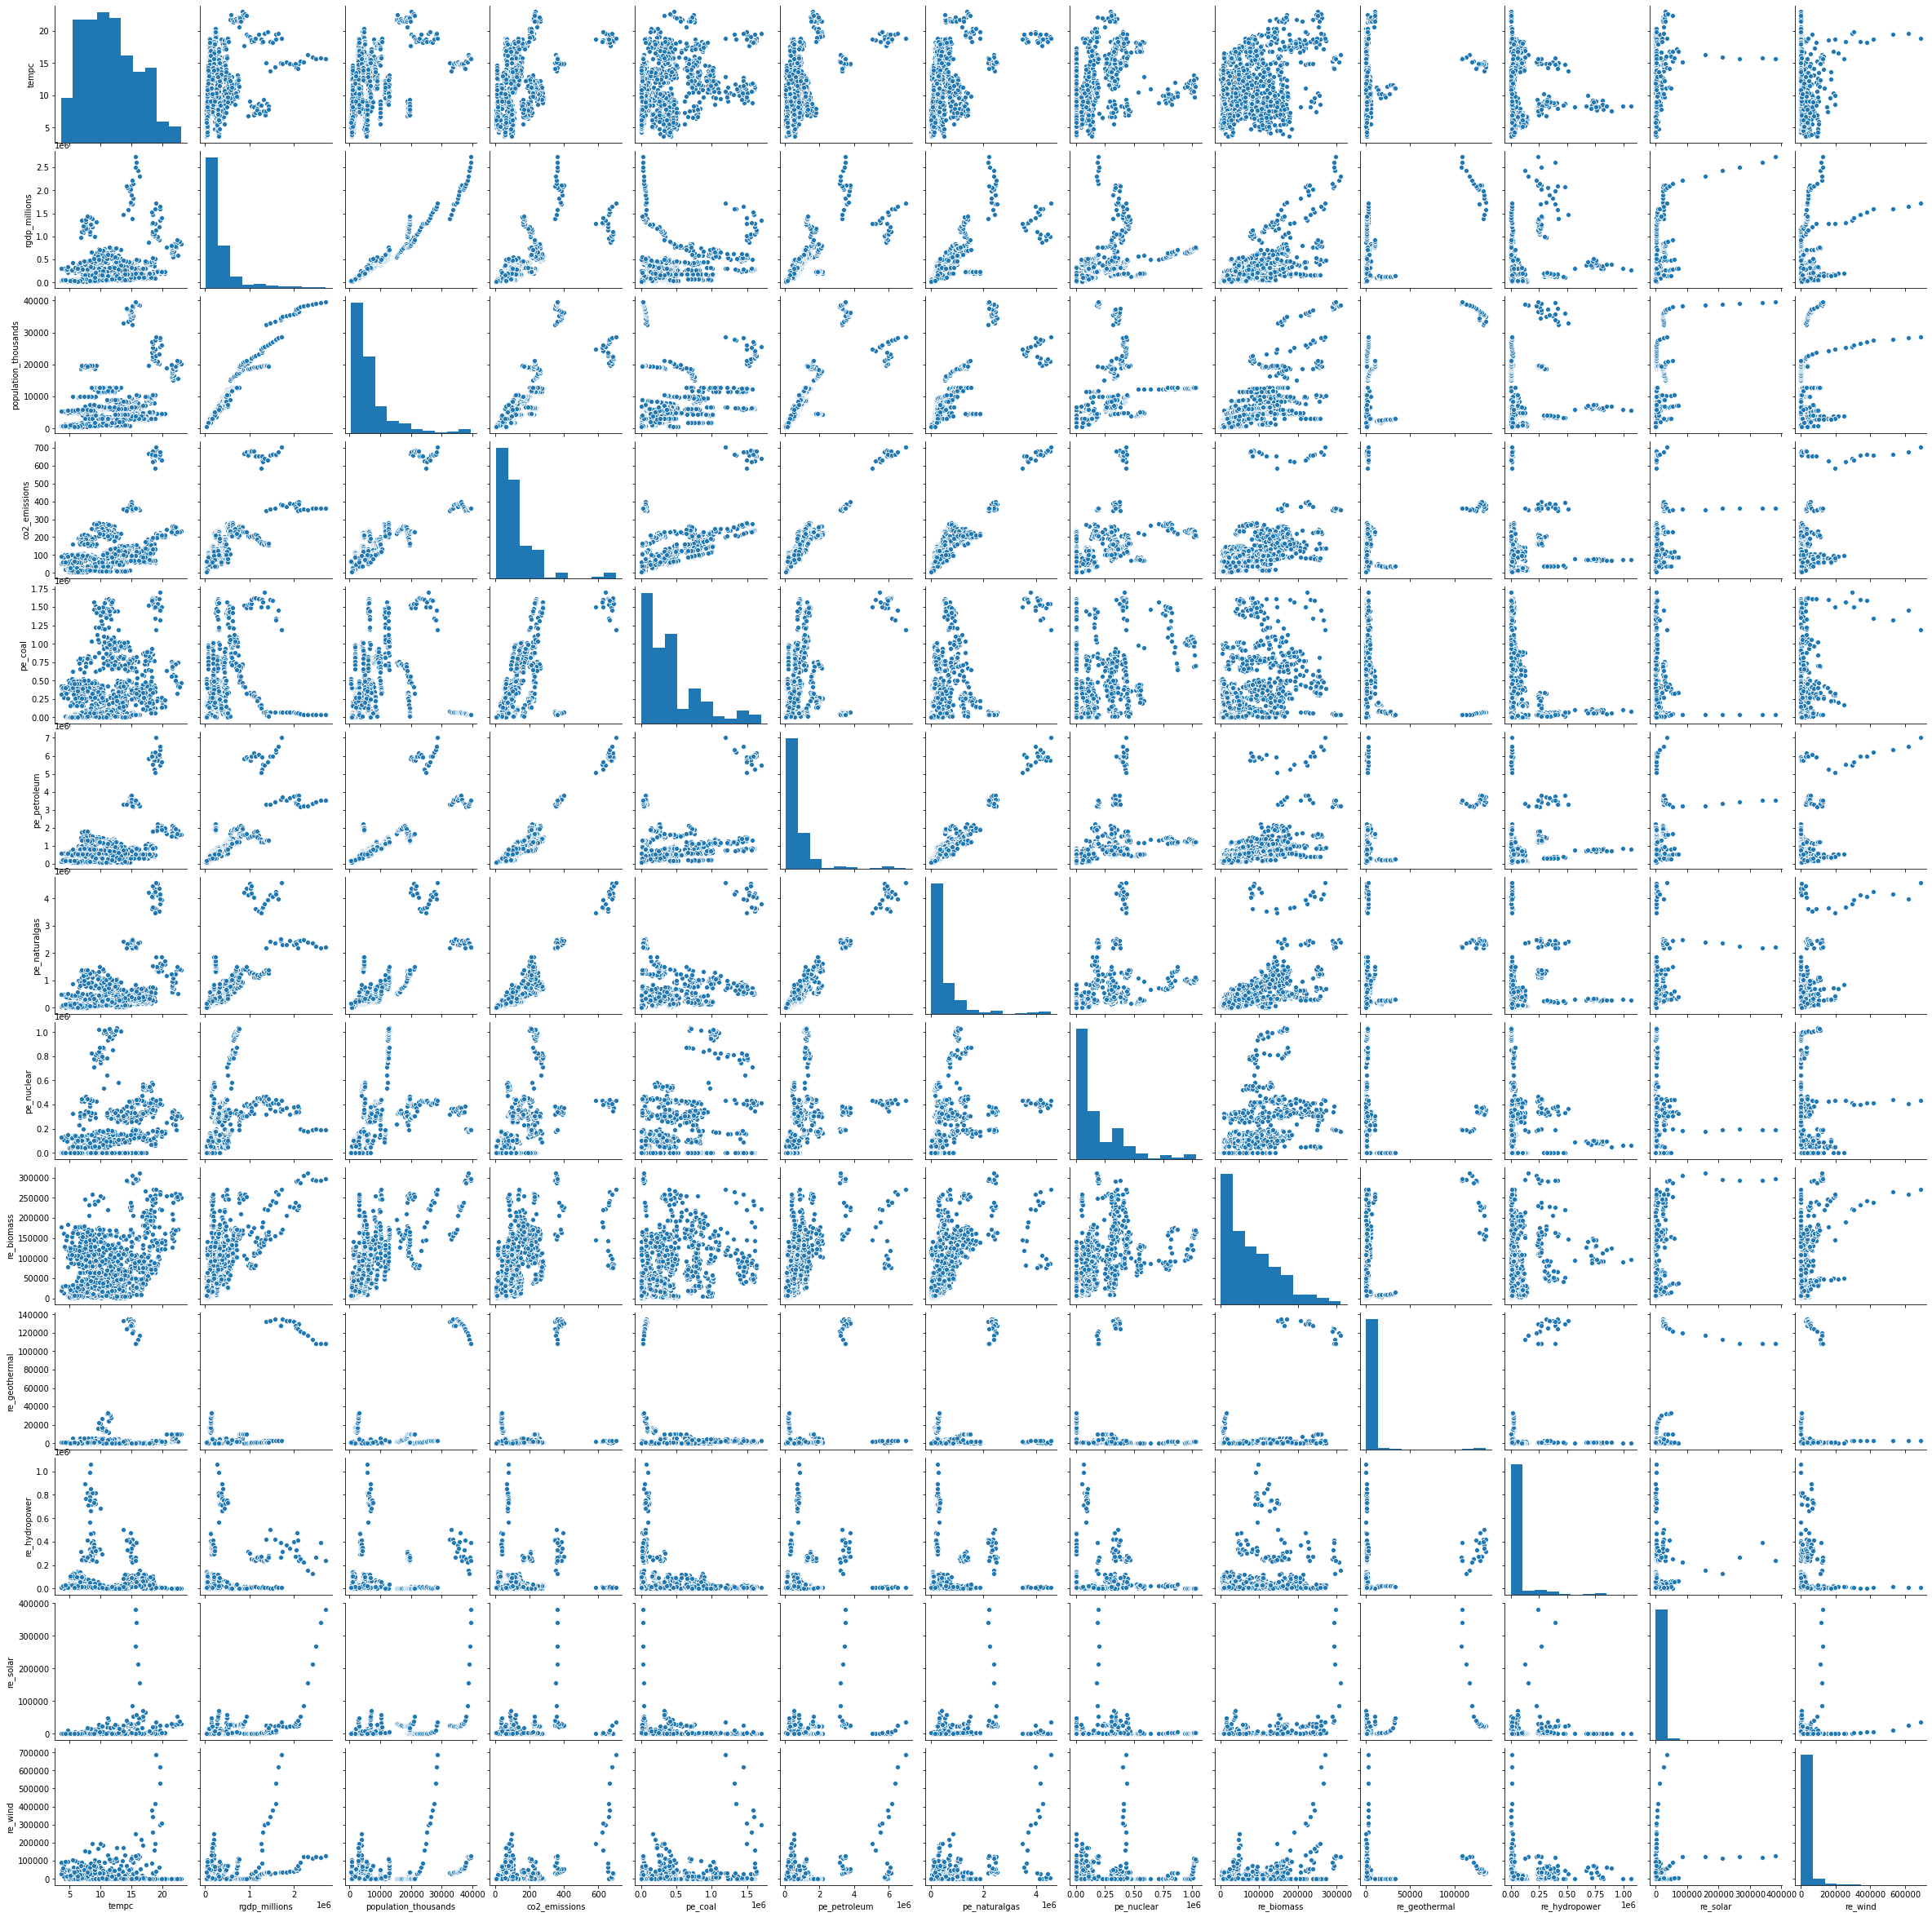

In [15]:
# Look at Pairplot
df1 = climate_df.loc[:,['tempc','rgdp_millions', 'population_thousands', 'co2_emissions',
                        'pe_coal', 'pe_petroleum', 'pe_naturalgas', 'pe_nuclear', 're_biomass',
                       're_geothermal','re_hydropower', 're_solar', 're_wind']]
sns.pairplot(df1)

In [16]:
# Create a power transformation instance
pt = PowerTransformer()

In [17]:
# Estimate the optimal parameter lambda for each feature
pt.fit(df1.values)

/Users/seanvillanoy/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


PowerTransformer()

In [18]:
# Print lambdas
pt.lambdas_

array([ 0.32240251, -4.94369329,  0.04061905,  0.16356274,  0.33749756,
       -4.94369329,  0.09632746,  0.12183216,  0.3281643 ,  0.02829815,
        0.16716634, -0.05450802, -0.03282376])

In [19]:
# Apply power transformation to each feature using the fitted lambdas
transformed_array = pt.transform(df1)

In [20]:
# Put transformed data in a data frame
df1_transformed1 = pd.DataFrame(transformed_array)
df1_transformed1.columns = df1.columns
df1_transformed1.head()

tempc  rgdp_millions  population_thousands  co2_emissions   pe_coal  \
0  1.185849            0.0              0.088314       0.538842  1.101186   
1  0.996184            0.0              0.170777      -0.168271  0.262177   
2  0.904221            0.0             -0.432404      -0.362697 -0.059211   
3  0.845810            0.0              2.210765       1.748475 -0.737233   
4 -1.071686            0.0              0.003674      -0.111880  0.244948   

   pe_petroleum  pe_naturalgas  pe_nuclear  re_biomass  re_geothermal  \
0           0.0       0.099671    0.872498    1.329841      -1.582184   
1           0.0      -0.686080    0.869529   -1.004382      -0.334998   
2           0.0      -0.122007    0.635303    0.407558      -0.573068   
3           0.0       1.970862    0.883095    1.141717       3.123518   
4           0.0       0.028009   -1.308988   -0.977540      -0.060539   

   re_hydropower  re_solar   re_wind  
0       1.173504 -0.159416 -1.037817  
1       1.204396  1.168512 -1.037817  
2       0.435123  0.702362 -1.037817  
3       2.144580  1.825175  1.185624  
4       0.140451  0.060461 -1.037817

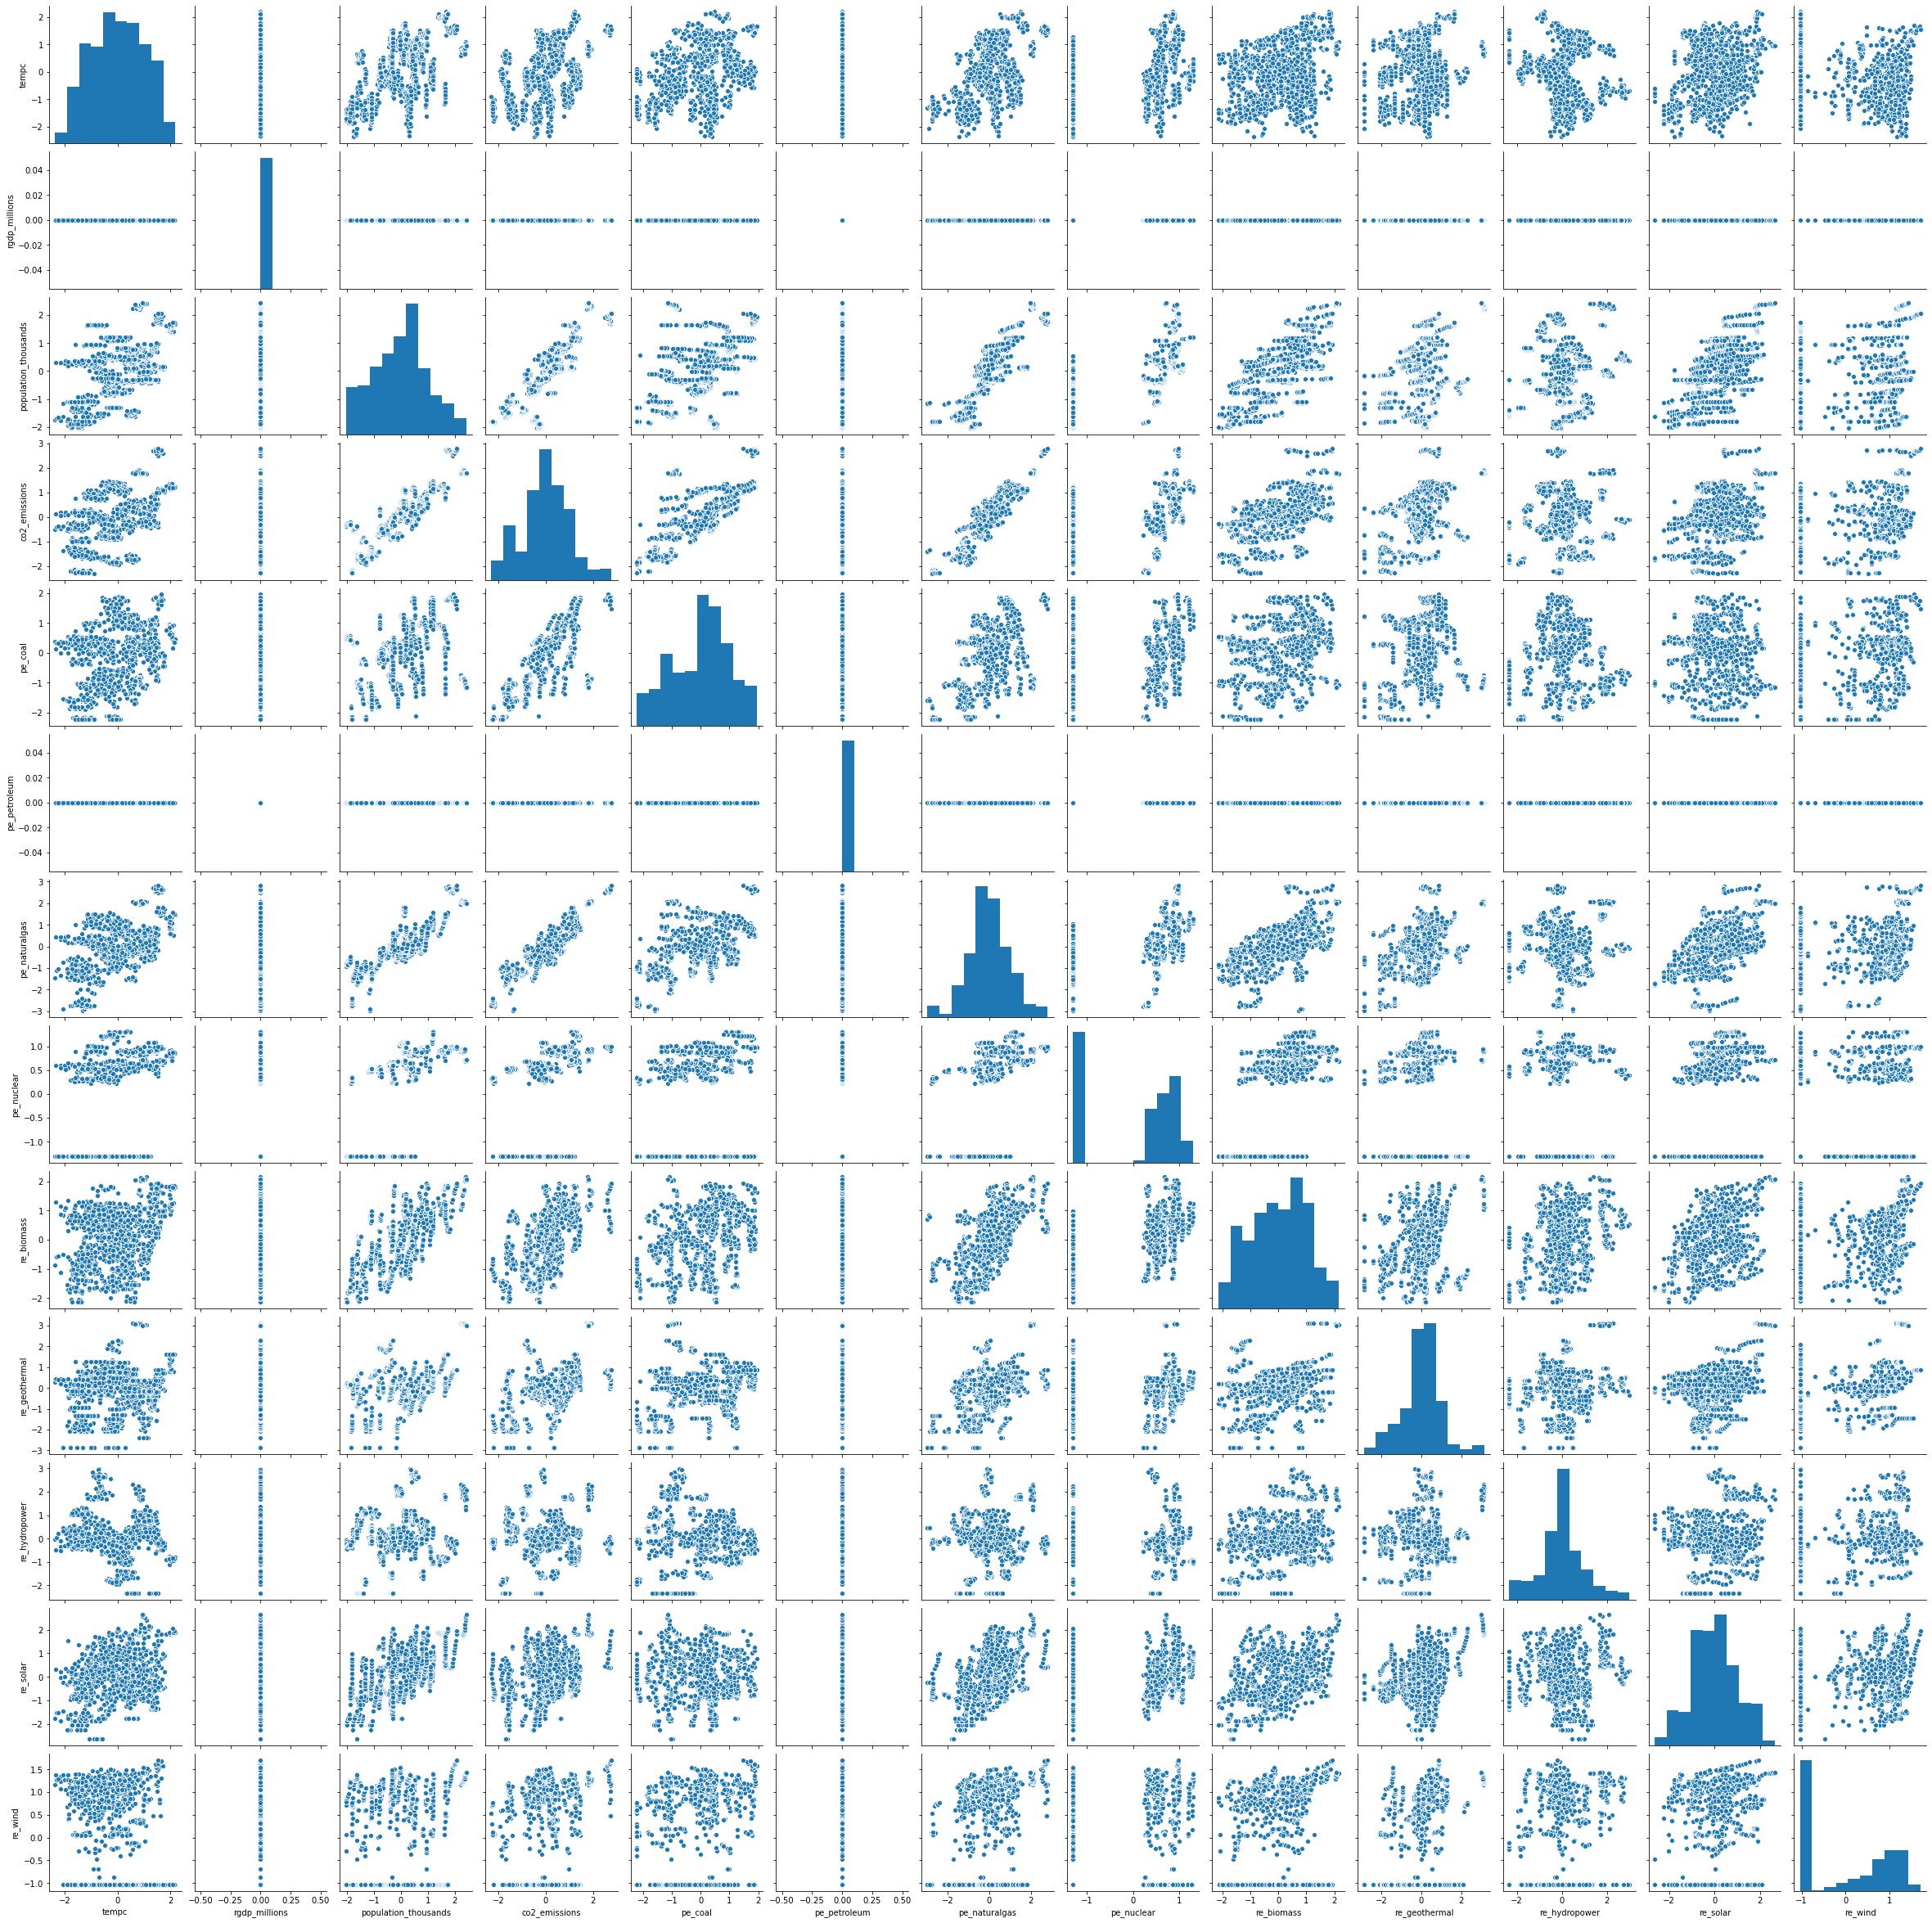

In [21]:
# Look at Pairplot after Yeo-Johnson Transformation
sns.pairplot(df1_transformed1)

# Run Regression Models

### Using untransformed data:
### Model tempc ~ co2_emissions

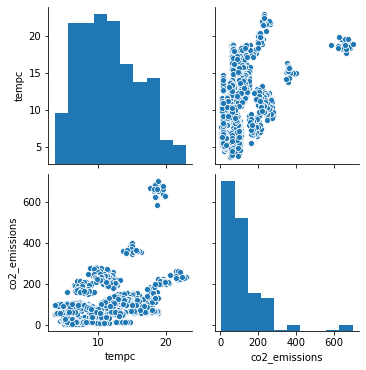

In [22]:
# Check pairplot
sns.pairplot(df1.loc[:,['tempc','co2_emissions']])

In [23]:
# Set the target and feature
y = df1['tempc']
X = df1['co2_emissions'].values.reshape(-1,1)

In [24]:
# Create instance for linear regression
reg = LinearRegression()

# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [25]:
# Make predictions
y_pred = reg.predict(X)

In [26]:
# Check R squared value
reg.score(X,y)

0.19384396239930135

In [27]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

9.653859417968595
[0.01702447]


In [28]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempc   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     253.4
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           2.68e-51
Time:                        20:09:11   Log-Likelihood:                -2922.7
No. Observations:                1056   AIC:                             5849.
Df Residuals:                    1054   BIC:                             5859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6539      0.171     56.409      0.0

### Using untransformed data:
### Model tempc ~ state_dummies + year + rgdp_millions + population_thousands + co2_emissions + pe_coal + pe_petroleum + pe_naturalgas + pe_nuclear + re_biomass+   re_geothermal + re_hydropower + re_solar + re_wind

In [29]:
# Set the target and feature
y = df1['tempc']
X = climate_df[state_dummies].merge(climate_df['year'], left_index =True, right_index = True).merge(df1.iloc[:,1:], left_index = True, right_index = True)

In [30]:
# Create instance for linear regression
reg = LinearRegression()

# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [31]:
# Create predictions
y_pred = reg.predict(X)

In [32]:
# Check R squared value
reg.score(X,y)

0.9780677673384536

In [33]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

1210845.1506764814
[-1.21085544e+06 -1.21085854e+06 -1.21085853e+06 -1.21085944e+06
 -1.21086703e+06 -1.21086551e+06 -1.21086233e+06 -1.21085215e+06
 -1.21085558e+06 -1.21086877e+06 -1.21086111e+06 -1.21086167e+06
 -1.21086510e+06 -1.21086209e+06 -1.21086057e+06 -1.21085462e+06
 -1.21086970e+06 -1.21086223e+06 -1.21086603e+06 -1.21086619e+06
 -1.21086896e+06 -1.21085722e+06 -1.21086139e+06 -1.21086916e+06
 -1.21086514e+06 -1.21086507e+06 -1.21086881e+06 -1.21086313e+06
 -1.21086276e+06 -1.21086568e+06 -1.21085870e+06 -1.21086981e+06
 -1.21086216e+06 -1.21085886e+06 -1.21086554e+06 -1.21086261e+06
 -1.21086544e+06 -1.21085698e+06 -1.21086770e+06 -1.21085945e+06
 -1.21085352e+06 -1.21086563e+06 -1.21086953e+06 -1.21086119e+06
 -1.21086406e+06 -1.21086280e+06 -1.21086761e+06 -1.21086909e+06
  1.53425614e-02 -7.47619197e-07  1.18646843e-04 -2.75180097e-02
  8.68923962e-07  1.75973400e-06  5.11412509e-07 -9.28062946e-07
 -4.57884744e-06  6.00342173e-06 -3.57837416e-06  3.40631232e-06
 -1.95

In [34]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempc   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     739.5
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:09:11   Log-Likelihood:                -1019.6
No. Observations:                1056   AIC:                             2161.
Df Residuals:                     995   BIC:                             2464.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [35]:
# Create a dataframe of actual and predicted co2 emissions
tempc1_full_df = pd.DataFrame({'Actual tempc': y, 'Predicted tempc':y_pred})
print(f'R-squared = {r2_score(y, y_pred)}')
tempc1_full_df

R-squared = 0.9780677673384536


Actual tempc  Predicted tempc
0        16.870370        17.357492
1        15.847222        16.069815
2        15.365741        16.120766
3        15.064815        14.962735
4         7.134259         7.994878
...            ...              ...
1051     13.648148        13.555157
1052      8.916667         8.625750
1053     11.833333        11.918480
1054      6.226852         6.827625
1055      5.782407         6.011530

[1056 rows x 2 columns]

In [36]:
# Validate the model by training it on training data and then testing it on testing data

# Create instance for linear regression
reg = LinearRegression()

# Split data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

# Train model on training data set
reg.fit(X_train, y_train)

# Create predictions
y_pred = reg.predict(X_test)

# Create a dataframe of actual and predicted co2 emissions
tempc1_split_df = pd.DataFrame({'Actual tempc': y_test, 'Predicted tempc':y_pred})
print(f'R-squared = {r2_score(y_test, y_pred)}')
tempc1_split_df

R-squared = 0.967260151024371


Actual tempc  Predicted tempc
530     15.476852        16.267752
453     18.199074        17.895782
925     13.981481        13.306535
521      9.939815         9.522719
839      5.504630         5.968833
..            ...              ...
855     13.675926        14.983000
592      4.921296         5.651508
636      8.995370         8.615759
856     18.250000        18.896767
888     10.449074         9.631461

[264 rows x 2 columns]

### Using untransformed data:
### Model tempc ~ rgdp_millions + population_thousands + co2_emissions + pe_coal + pe_petroleum + pe_naturalgas + pe_nuclear + re_biomass+   re_geothermal + re_hydropower + re_solar + re_wind


In [37]:
# Set the target and feature
y = df1['tempc']
X = df1.iloc[:,1:]

In [38]:
# Create instance for linear regression
reg = LinearRegression()

# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [39]:
# Create predictions
y_pred = reg.predict(X)

In [40]:
# Check R squared value
reg.score(X,y)

0.43612772397544464

In [41]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

9.291500290088676
[-2.31014539e-05  8.03623232e-04  1.40411265e-01 -1.52475749e-05
 -3.70331201e-06 -7.40445358e-06  3.89126963e-06  8.60210595e-06
 -3.00934736e-05 -4.19699230e-06  5.66642280e-05 -1.74519530e-06]


In [42]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempc   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     67.23
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          9.20e-121
Time:                        20:09:11   Log-Likelihood:                -2733.9
No. Observations:                1056   AIC:                             5494.
Df Residuals:                    1043   BIC:                             5558.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.2915 

In [43]:
# Create a dataframe of actual and predicted co2 emissions
tempc2_full_df = pd.DataFrame({'Actual tempc': y, 'Predicted tempc':y_pred})
print(f'R-squared = {r2_score(y, y_pred)}')
tempc2_full_df

R-squared = 0.43612772397544464


Actual tempc  Predicted tempc
0        16.870370        13.047063
1        15.847222        12.064388
2        15.365741        12.169195
3        15.064815        20.818452
4         7.134259         9.743971
...            ...              ...
1051     13.648148        12.365919
1052      8.916667         6.688065
1053     11.833333         9.248205
1054      6.226852        11.230156
1055      5.782407         8.915685

[1056 rows x 2 columns]

In [44]:
# Validate the model by training it on training data and then testing it on testing data

# Create instance for linear regression
reg = LinearRegression()

# Split data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

# Train model on training data set
reg.fit(X_train, y_train)

# Create predictions
y_pred = reg.predict(X_test)

# Create a dataframe of actual and predicted co2 emissions
tempc2_split_df = pd.DataFrame({'Actual tempc': y_test, 'Predicted tempc':y_pred})
print(f'R-squared = {r2_score(y_test, y_pred)}')
tempc2_split_df

R-squared = 0.3884784701735998


Actual tempc  Predicted tempc
530     15.476852        11.860864
453     18.199074        12.582840
925     13.981481        10.363269
521      9.939815         9.613195
839      5.504630         9.311485
..            ...              ...
855     13.675926        12.595321
592      4.921296        10.924492
636      8.995370        11.747355
856     18.250000        15.258667
888     10.449074        10.272005

[264 rows x 2 columns]

### Using power transformed data (Yeo-Johnson Power Transformation):
### Model tempc ~ rgdp_millions + population_thousands + co2_emissions + pe_coal + pe_petroleum + pe_naturalgas + pe_nuclear + re_biomass+   re_geothermal + re_hydropower + re_solar + re_wind

In [45]:
# Set the target and feature
y = df1_transformed1['tempc']
X = df1_transformed1.iloc[:,1:]

In [46]:
# Create instance for linear regression
reg = LinearRegression()

In [47]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [48]:
# Create predictions
y_pred = reg.predict(X)

In [49]:
# Check R squared value
reg.score(X,y)

0.4778848929089312

In [50]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

8.253853411648641e-17
[ 0.00000000e+00 -1.90886854e-01  2.01795593e-01  5.59478042e-02
  2.22044605e-16  3.21843666e-01  7.53889354e-02  7.85281795e-02
 -1.61883981e-02 -1.63263353e-01  2.21923735e-01 -4.08395526e-01]


In [51]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempc   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     95.65
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          5.68e-140
Time:                        20:09:11   Log-Likelihood:                -1155.3
No. Observations:                1056   AIC:                             2333.
Df Residuals:                    1045   BIC:                             2387.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -1.11e-16 

### Using log transformed data:
### Model log(tempc) ~ log(rgdp_millions) + log(population_thousands) + log(co2_emissions) + log(pe_coal) + log(pe_petroleum) + log(pe_naturalgas) + log(pe_nuclear) + log(re_biomass) +  log(re_geothermal) + log(re_hydropower) + log(re_solar) + log(re_wind)

In [52]:
# pt.lambdas_
# array([ 0.32240251, -4.94369329,  0.04061904,  0.16356274,  0.33749756,
#       -4.94369329,  0.09632746,  0.12183216,  0.3281643 ,  0.02829815,
#        0.16716634, -0.05450802, -0.03282376])
# Close to 0 -> log transform 

In [53]:
# Create a new datframe with logged variables 
# Add an abritrarily small value (ex. 0.001) to columns with 0 as min value 
df1_transformed2 = df1.copy()
df1_transformed2['tempc'] = np.log10(df1_transformed2['tempc'])
df1_transformed2['rgdp_millions'] = np.log10(df1_transformed2['rgdp_millions'])
df1_transformed2['population_thousands'] = np.log10(df1_transformed2['population_thousands'])
df1_transformed2['co2_emissions'] = np.log10(df1_transformed2['co2_emissions'])
df1_transformed2['pe_coal'] = np.log10(df1_transformed2['pe_coal'] + 0.001)
df1_transformed2['pe_petroleum'] = np.log10(df1_transformed2['pe_petroleum'] + 0.001)
df1_transformed2['pe_naturalgas'] = np.log10(df1_transformed2['pe_naturalgas'] + 0.001)
df1_transformed2['pe_nuclear'] = np.log10(df1_transformed2['pe_nuclear']+ 0.001)
df1_transformed2['re_biomass'] = np.log10(df1_transformed2['re_biomass']+ 0.001)
df1_transformed2['re_geothermal'] = np.log10(df1_transformed2['re_geothermal']+ 0.001)
df1_transformed2['re_hydropower'] = np.log10(df1_transformed2['re_hydropower']+ 0.001)
df1_transformed2['re_solar'] = np.log10(df1_transformed2['re_solar']+ 0.001)
df1_transformed2['re_wind'] = np.log10(df1_transformed2['re_wind']+ 0.001)
df1_transformed2.columns = ['log_tempc', 'log_rgdp_millions', 'log_population_thousands', 'log_co2_emissions',
       'log_pe_coal', 'log_pe_petroleum', 'log_pe_naturalgas', 'log_pe_nuclear', 'log_re_biomass',
       'log_re_geothermal', 'log_re_hydropower', 'log_re_solar', 'log_re_wind']
df1_transformed2.head()

log_tempc  log_rgdp_millions  log_population_thousands  log_co2_emissions  \
0   1.227125           5.157294                  3.640283           2.130012   
1   1.199953           5.226729                  3.675503           1.856124   
2   1.186554           4.917799                  3.415140           1.775246   
3   1.177964           6.139455                  4.511696           2.539829   
4   0.853349           5.265273                  3.604010           1.879096   

   log_pe_coal  log_pe_petroleum  log_pe_naturalgas  log_pe_nuclear  \
0     5.938151          5.720101           5.528185        5.491832   
1     5.568051          5.633561           5.138581        5.488019   
2     5.392321          5.505747           5.421635        5.173478   
3     4.917248          6.517485           6.339457        5.505413   
4     5.559216          5.569978           5.494015       -3.000000   

   log_re_biomass  log_re_geothermal  log_re_hydropower  log_re_solar  \
0        5.260558           1.230474           5.070629      2.139882   
1        4.215400           2.376579           5.090117      3.578868   
2        4.938940           2.167320           4.555167      3.044540   
3        5.200998           5.121268           5.622515      4.397732   
4        4.233580           2.613843           4.317039      2.361730   

   log_re_wind  
0    -3.000000  
1    -3.000000  
2    -3.000000  
3     4.505652  
4    -3.000000

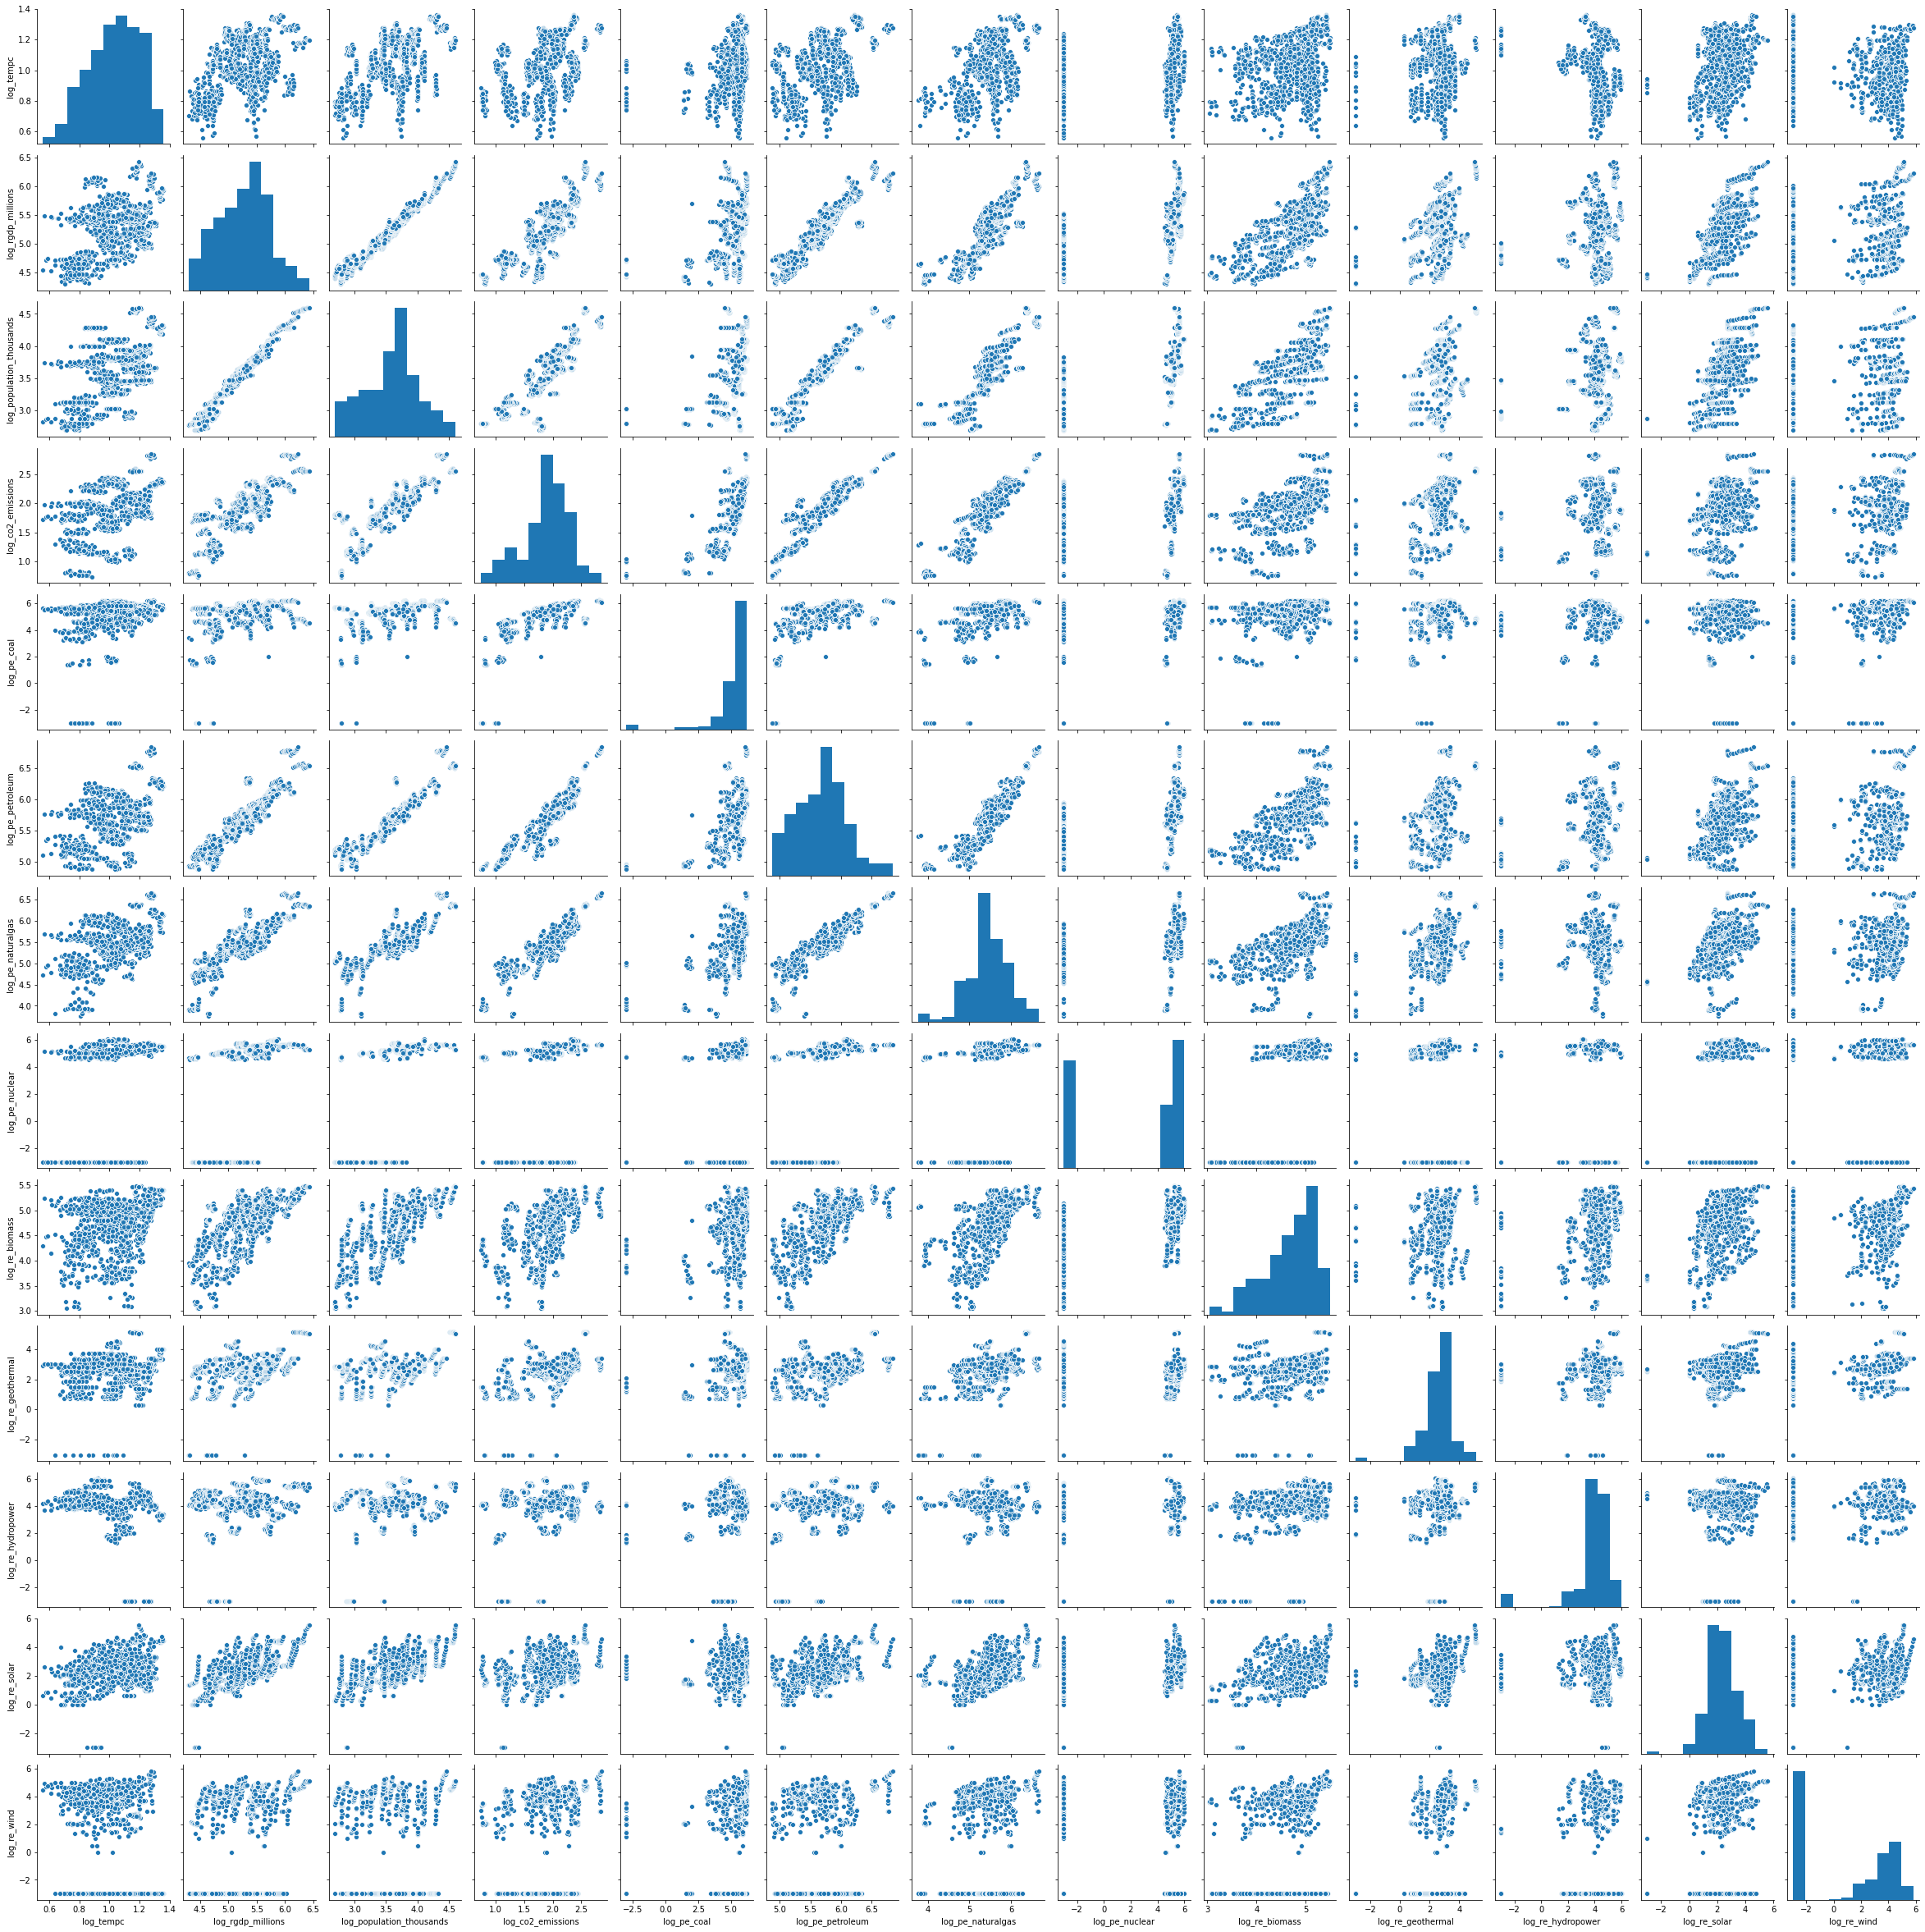

In [54]:
# Look at Pairplot after log transformation
sns.pairplot(df1_transformed2)

In [55]:
# Set the target and feature
y = df1_transformed2['log_tempc']
X = df1_transformed2.iloc[:,1:]

In [56]:
# Create instance for linear regression
reg = LinearRegression()

# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [57]:
# Check R squared value
reg.score(X,y)

0.5465273871838471

In [58]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

1.1515300205859977
[-5.46720932e-01  4.87523423e-01  6.27338883e-02 -1.69480072e-03
  9.62481463e-02  8.65444396e-02  4.88889870e-03 -2.26259410e-02
  5.35949044e-04 -2.81975285e-02  3.95690154e-02 -1.35327604e-02]


In [59]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              log_tempc   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     104.8
Date:                Thu, 08 Apr 2021   Prob (F-statistic):          1.27e-169
Time:                        20:10:10   Log-Likelihood:                 794.76
No. Observations:                1056   AIC:                            -1564.
Df Residuals:                    1043   BIC:                            -1499.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Using log transformed data
### Model log(tempc)~ log(C02 emissions)

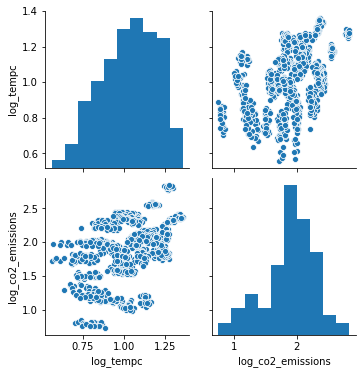

In [60]:
# Check pairplot
sns.pairplot(df1_transformed2.loc[:,['log_tempc','log_co2_emissions']])

In [61]:
# Set the target and feature
y = df1_transformed2['log_tempc'].values
X = df1_transformed2['log_co2_emissions'].values.reshape(-1,1)

In [62]:
# Create instance for linear regression
reg = LinearRegression()

# Train model on data set
reg.fit(X, y)

LinearRegression()

In [63]:
# Create predictions
y_pred = reg.predict(X)

In [64]:
# Check R squared value
reg.score(X,y)

0.23088312776623565

In [65]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

0.6630752200730523
[0.19607085]


In [66]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     316.4
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           4.22e-62
Time:                        20:10:11   Log-Likelihood:                 515.82
No. Observations:                1056   AIC:                            -1028.
Df Residuals:                    1054   BIC:                            -1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6631      0.021     31.090      0.0

### Using log transformed data:
### Model log(tempc) ~ log(rgdp_millions) + log(population_thousands) + log(co2_emissions) + log(pe_coal) + log(pe_petroleum) + log(pe_naturalgas) + log(pe_nuclear) + log(re_biomass) +  log(re_geothermal) + log(re_hydropower) + log(re_solar) + log(re_wind)

In [67]:
# Set the target and feature
y = df1_transformed2['log_co2_emissions']
X = df1_transformed2.drop('log_co2_emissions',axis='columns')

In [68]:
# Create instance for linear regression
reg = LinearRegression()

# Train model on data set
reg.fit(X, y)

LinearRegression()

In [69]:
# Create predictions
y_pred = reg.predict(X)

In [70]:
# Check R squared value
reg.score(X,y)

0.930512246322653

In [71]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

-2.621466296800653
[ 5.77331889e-02 -3.01003266e-01  3.42095275e-01  6.80634474e-02
  6.21668784e-01  2.51329133e-01 -4.92168737e-04 -8.97712601e-02
 -6.59778393e-03  1.24592121e-02 -2.43308973e-02  6.97809842e-03]


In [72]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      log_co2_emissions   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1164.
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:10:11   Log-Likelihood:                 838.62
No. Observations:                1056   AIC:                            -1651.
Df Residuals:                    1043   BIC:                            -1587.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Using log transformed data:
### Dropping the statistically insignificant results from the previous model
### Model log(co2_emissions) ~ log(rgdp_millions) + log(population_thousands) + log(pe_coal) + log(pe_petroleum) + log(pe_naturalgas) + log(re_biomass)  + log(re_hydropower) + log(re_solar) + log(re_wind)

In [73]:
# Set the target and feature
y = df1_transformed2['log_co2_emissions']
X = df1_transformed2.drop(['log_co2_emissions','log_tempc', 'log_pe_nuclear', 'log_re_geothermal'],axis='columns')

In [74]:
# Create instance for linear regression
reg = LinearRegression()

# Train model on data set
reg.fit(X, y)

LinearRegression()

In [75]:
# Create predictions
y_pred = reg.predict(X)

In [76]:
# Check R squared value
reg.score(X,y)

0.9300827970808215

In [77]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

-2.5431641222163974
[-0.33980712  0.37496038  0.06760751  0.63338824  0.25095026 -0.09198601
  0.01086064 -0.02243344  0.00591517]


In [78]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      log_co2_emissions   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1546.
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:10:11   Log-Likelihood:                 835.37
No. Observations:                1056   AIC:                            -1651.
Df Residuals:                    1046   BIC:                            -1601.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [79]:
# Create a dataframe of actual and predicted co2 emissions
carbon1_full_df = pd.DataFrame({'Actual CO2_emissions': y, 'Predicted CO2 emissions':y_pred})
print(f'R-squared = {r2_score(y, y_pred)}')
carbon1_full_df

R-squared = 0.9300827970808215


Actual CO2_emissions  Predicted CO2 emissions
0                 2.130012                 1.986542
1                 1.856124                 1.862618
2                 1.775246                 1.787786
3                 2.539829                 2.624383
4                 1.879096                 1.888276
...                    ...                      ...
1051              2.013259                 2.005205
1052              1.896526                 1.965967
1053              1.953760                 1.771819
1054              2.005609                 1.981032
1055              1.803457                 1.602970

[1056 rows x 2 columns]

In [80]:
# Validate the model by training it on training data and then testing it on testing data

# Create instance for linear regression
reg = LinearRegression()

# Split data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

# Train model on training data set
reg.fit(X_train, y_train)

# Create predictions
y_pred = reg.predict(X_test)

# Create a dataframe of actual and predicted co2 emissions
carbon1_split_df = pd.DataFrame({'Actual CO2_emissions': y_test, 'Predicted CO2 emissions':y_pred})
print(f'R-squared = {r2_score(y_test, y_pred)}')
carbon1_split_df

R-squared = 0.9260985237948318


Actual CO2_emissions  Predicted CO2 emissions
530              1.811575                 1.818790
453              1.822822                 1.879844
925              1.793092                 1.813847
521              1.849419                 1.824114
839              1.507856                 1.574602
..                    ...                      ...
855              2.017451                 2.021565
592              1.267172                 1.390264
636              1.958564                 1.856416
856              2.822233                 2.883375
888              1.706718                 1.622839

[264 rows x 2 columns]

# Other Linear Regressions

### Using untransformed data
### Model tempc ~ year

In [81]:
# Set the target and feature
y = climate_df['tempc'].values
X = climate_df['year'].values.reshape(-1,1)

In [82]:
# Create instance for linear regression
reg = LinearRegression()

In [83]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [84]:
# Create predictions
y_pred = reg.predict(X)

In [85]:
# Check R squared value
reg.score(X,y)

0.0005774416287842588

In [86]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

-21.00874618118732
[0.01625196]


In [87]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6090
Date:                Thu, 08 Apr 2021   Prob (F-statistic):              0.435
Time:                        20:10:11   Log-Likelihood:                -3036.1
No. Observations:                1056   AIC:                             6076.
Df Residuals:                    1054   BIC:                             6086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.0087     41.808     -0.503      0.6

### Using untransformed data
### Model tempc ~ state_dummies

In [88]:
# Set the target and feature
y = climate_df['tempc']
X = climate_df[state_dummies]

In [89]:
# Create instance for linear regression
reg = LinearRegression()

In [90]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [91]:
# Create predictions
y_pred = reg.predict(X)

In [92]:
# Check R squared value
reg.score(X,y)

0.9758074649062659

In [93]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

27659283609538.6
[-2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13
 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13
 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13
 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13
 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13
 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13
 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13
 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13
 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13
 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13
 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13
 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13 -2.76592836e+13]


In [94]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempc   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     872.0
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:10:11   Log-Likelihood:                -1067.2
No. Observations:                1056   AIC:                             2230.
Df Residuals:                    1008   BIC:                             2469.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [95]:
# Create a dataframe of actual and predicted co2 emissions
tempc3_full_df = pd.DataFrame({'Actual tempc': y, 'Predicted tempc':y_pred})
print(f'R-squared = {r2_score(y, y_pred)}')
tempc3_full_df

R-squared = 0.9758074649062659


Actual tempc  Predicted tempc
0        16.870370        17.660156
1        15.847222        16.339844
2        15.365741        16.375000
3        15.064815        15.027344
4         7.134259         7.968750
...            ...              ...
1051     13.648148        13.386719
1052      8.916667         8.484375
1053     11.833333        11.488281
1054      6.226852         6.824219
1055      5.782407         5.882812

[1056 rows x 2 columns]

In [96]:
# Validate the model by training it on training data and then testing it on testing data

# Create instance for linear regression
reg = LinearRegression()

# Split data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

# Train model on training data set
reg.fit(X_train, y_train)

# Create predictions
y_pred = reg.predict(X_test)

# Create a dataframe of actual and predicted co2 emissions
tempc3_split_df = pd.DataFrame({'Actual tempc3': y_test, 'Predicted tempc3':y_pred})
print(f'R-squared = {r2_score(y_test, y_pred)}')
tempc3_split_df

R-squared = 0.9644855830055497


Actual tempc3  Predicted tempc3
530      15.476852         16.257812
453      18.199074         17.933594
925      13.981481         13.121094
521       9.939815          9.613281
839       5.504630          5.839844
..             ...               ...
855      13.675926         14.812500
592       4.921296          5.597656
636       8.995370          9.105469
856      18.250000         18.949219
888      10.449074          9.785156

[264 rows x 2 columns]

### Using untransformed data
### Model tempc ~ year + state_dummies

In [97]:
# Set the target and feature
y = climate_df['tempc'].values
Xlist = state_dummies
Xlist.append('year')
X = climate_df.loc[:,Xlist].values

In [98]:
# Create instance for linear regression
reg = LinearRegression()

In [99]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [100]:
# Create predictions
y_pred = reg.predict(X)

In [101]:
# Check R squared value
reg.score(X,y)

0.976572779956681

In [102]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

-21.008746181188087
[ 5.98963594  4.62663089  4.62663089  3.421875   -3.61263678 -1.55666035
  1.91556187 10.28298611  6.30908039 -4.91145833 -0.01625631 -0.19870581
 -2.35569234  1.37094907  1.98647938  7.98626894 -6.02740951  1.45238847
 -2.19702231 -4.08801557 -5.97122264  6.32886153  1.43976221 -5.5669718
 -1.72206439 -0.97101221 -4.78687921  0.47364268  0.95449285 -3.68565867
  3.74026726 -6.38220749 -0.60022096  4.25815446 -2.75384049 -1.81802399
 -1.14714857  5.85811237 -3.77825126  3.16450968  7.25036827 -1.96953914
 -5.31634049  1.76825547 -3.0926452  -0.10527146 -4.80666035 -5.76709806
  0.01625196]


In [103]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     874.5
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:10:12   Log-Likelihood:                -1054.4
No. Observations:                1056   AIC:                             2207.
Df Residuals:                    1007   BIC:                             2450.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.5800      6.415     -3.208      0.0

# Verify if features can predict state

### Neural Network

In [104]:
df2 = climate_df.loc[:,['state_name_Alabama', 'state_name_Arizona', 'state_name_Arkansas',
       'state_name_California', 'state_name_Colorado',
       'state_name_Connecticut', 'state_name_Delaware', 'state_name_Florida',
       'state_name_Georgia', 'state_name_Idaho', 'state_name_Illinois',
       'state_name_Indiana', 'state_name_Iowa', 'state_name_Kansas',
       'state_name_Kentucky', 'state_name_Louisiana', 'state_name_Maine',
       'state_name_Maryland', 'state_name_Massachusetts',
       'state_name_Michigan', 'state_name_Minnesota', 'state_name_Mississippi',
       'state_name_Missouri', 'state_name_Montana', 'state_name_Nebraska',
       'state_name_Nevada', 'state_name_New Hampshire',
       'state_name_New Jersey', 'state_name_New Mexico', 'state_name_New York',
       'state_name_North Carolina', 'state_name_North Dakota',
       'state_name_Ohio', 'state_name_Oklahoma', 'state_name_Oregon',
       'state_name_Pennsylvania', 'state_name_Rhode Island',
       'state_name_South Carolina', 'state_name_South Dakota',
       'state_name_Tennessee', 'state_name_Texas', 'state_name_Utah',
       'state_name_Vermont', 'state_name_Virginia', 'state_name_Washington',
       'state_name_West Virginia', 'state_name_Wisconsin',
       'state_name_Wyoming', 'year', 'tempc', 'co2_emissions',
       'population_thousands', 'rgdp_millions', 'pe_coal', 'pe_petroleum',
       'pe_naturalgas', 'pe_nuclear', 're_biomass', 're_geothermal',
       're_hydropower', 're_solar', 're_wind']]
print(df2.shape)
df2.head()

(1056, 62)


state_name_Alabama  state_name_Arizona  state_name_Arkansas  \
0                 1.0                 0.0                  0.0   
1                 0.0                 1.0                  0.0   
2                 0.0                 0.0                  1.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   state_name_California  state_name_Colorado  state_name_Connecticut  \
0                    0.0                  0.0                     0.0   
1                    0.0                  0.0                     0.0   
2                    0.0                  0.0                     0.0   
3                    1.0                  0.0                     0.0   
4                    0.0                  1.0                     0.0   

   state_name_Delaware  state_name_Florida  state_name_Georgia  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   

   state_name_Idaho  ...  rgdp_millions  pe_coal  pe_petroleum  pe_naturalgas  \
0               0.0  ...         143646   867264        524929         337431   
1               0.0  ...         168550   369872        430092         137588   
2               0.0  ...          82756   246786        320440         264019   
3               0.0  ...        1378654    82651       3292194        2185029   
4               0.0  ...         184193   362423        371516         311900   

   pe_nuclear  re_biomass  re_geothermal  re_hydropower  re_solar  re_wind  
0      310336      182204             17         117660       138        0  
1      307623       16421            238         123060      3792        0  
2      149100       86884            147          35906      1108        0  
3      320194      158854         132211         419290     24988    32037  
4           0       17123            411          20751       230        0  

[5 rows x 62 columns]

In [105]:
# Set the target and feature
y = df2.iloc[:,:48].values
X = df2.iloc[:,48:].values

In [106]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [107]:
# Scale the training and testing input features using StandardScaler
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [108]:
# Create a sequential model
model = Sequential()

In [109]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
number_outputs = 48

In [110]:
# Add the first input layer where the input dimensions are the 14 columns of non state features
model.add(Dense(units= hidden_nodes_layer1 , activation='relu', input_dim = number_input_features))

In [111]:
# Add output layer using 48 output nodes for the 48 states
model.add(Dense(number_outputs, activation="softmax"))

In [112]:
# Compile the model using categorical_crossentropy for the loss function, the adam optimizer,
# and add accuracy to the training metrics
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [113]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1500      
_________________________________________________________________
dense_1 (Dense)              (None, 48)                4848      
Total params: 6,348
Trainable params: 6,348
Non-trainable params: 0
_________________________________________________________________


In [114]:
# Use the training data to fit (train) the model
model.fit(X_train_scaled, y_train, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
25/25 - 1s - loss: 3.6630 - accuracy: 0.0631
Epoch 2/100
25/25 - 0s - loss: 3.2927 - accuracy: 0.1970
Epoch 3/100
25/25 - 0s - loss: 2.9988 - accuracy: 0.3106
Epoch 4/100
25/25 - 0s - loss: 2.7335 - accuracy: 0.3586
Epoch 5/100
25/25 - 0s - loss: 2.4853 - accuracy: 0.4533
Epoch 6/100
25/25 - 0s - loss: 2.2562 - accuracy: 0.5177
Epoch 7/100
25/25 - 0s - loss: 2.0319 - accuracy: 0.5997
Epoch 8/100
25/25 - 0s - loss: 1.8231 - accuracy: 0.6869
Epoch 9/100
25/25 - 0s - loss: 1.6344 - accuracy: 0.7235
Epoch 10/100
25/25 - 0s - loss: 1.4661 - accuracy: 0.7740
Epoch 11/100
25/25 - 0s - loss: 1.3140 - accuracy: 0.8030
Epoch 12/100
25/25 - 0s - loss: 1.1865 - accuracy: 0.8333
Epoch 13/100
25/25 - 0s - loss: 1.0747 - accuracy: 0.8485
Epoch 14/100
25/25 - 0s - loss: 0.9760 - accuracy: 0.8838
Epoch 15/100
25/25 - 0s - loss: 0.8891 - accuracy: 0.9091
Epoch 16/100
25/25 - 0s - loss: 0.8115 - accuracy: 0.9116
Epoch 17/100
25/25 - 0s - loss: 0.7443 - accuracy: 0.9154
Epoch 18/100
25/25 - 0s

In [115]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 0.0752 - accuracy: 0.9848
Normal Neural Network - Loss: 0.0752442479133606, Accuracy: 0.9848484992980957


# Export CSV Files

In [116]:
# Export cleaned data
file_path = "../Resources/data_processed/tempc1_full_df.csv"
tempc1_full_df.to_csv(file_path, index = False)

In [117]:
# Export cleaned data
file_path = "../Resources/data_processed/tempc1_split_df.csv"
tempc1_split_df.to_csv(file_path, index = False)

In [118]:
# Export cleaned data
file_path = "../Resources/data_processed/tempc2_full_df.csv"
tempc2_full_df.to_csv(file_path, index = False)

In [119]:
# Export cleaned data
file_path = "../Resources/data_processed/tempc2_split_df.csv"
tempc2_split_df.to_csv(file_path, index = False)

In [120]:
# Export cleaned data
file_path = "../Resources/data_processed/tempc3_full_df.csv"
tempc3_full_df.to_csv(file_path, index = False)

In [121]:
# Export cleaned data
file_path = "../Resources/data_processed/tempc3_split_df.csv"
tempc3_split_df.to_csv(file_path, index = False)

In [122]:
# Export cleaned data
file_path = "../Resources/data_processed/carbon1_full_df.csv"
carbon1_full_df.to_csv(file_path, index = False)

In [123]:
# Export cleaned data
file_path = "../Resources/data_processed/carbon1_split_df.csv"
carbon1_split_df.to_csv(file_path, index = False)